BLACK FRIDAY SALES DATA ANALYSIS WALKTHROUGH

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [6]:
del df['Product_Category_2']
del df['Product_Category_3']

In [7]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


ANALYSING COLUMNS

In [8]:
df['User_ID'].nunique()                                  ##Tells  how many unique customers

5891

In [9]:
df['User_ID'].unique()  

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [10]:
df['Age'].nunique()

7

In [11]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [12]:
df['Purchase'].sum()

5017668378

In [13]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [14]:
for column in df.columns:
    print(column, df[column].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


ANALYSING GENDER

In [15]:
len(df[df['Gender'] == 'M']) , len(df[df['Gender'] == 'F'])                          ## No. of Males and females in the data

(405380, 132197)

In [16]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']) , len(df[df['Gender'] == 'F'])]}, index = ['Male', 'Female'])

In [17]:
data

,Ratio
Male,405380
Female,132197


<AxesSubplot:ylabel='Ratio'>

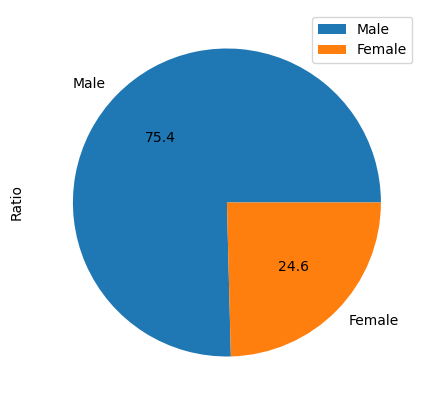

In [18]:
data.plot.pie(y = 'Ratio', figsize = (5,5), autopct = "%.1f")

<AxesSubplot:title={'center':'Gender Ratio'}, ylabel='None'>

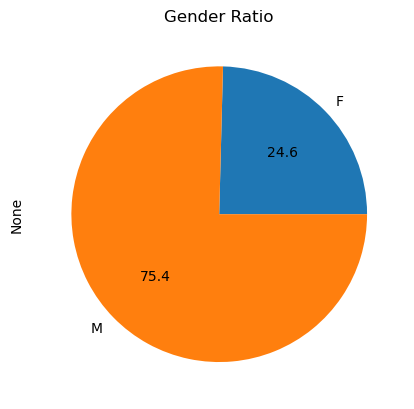

In [19]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = "%.1f", title = 'Gender Ratio')

<AxesSubplot:xlabel='Gender'>

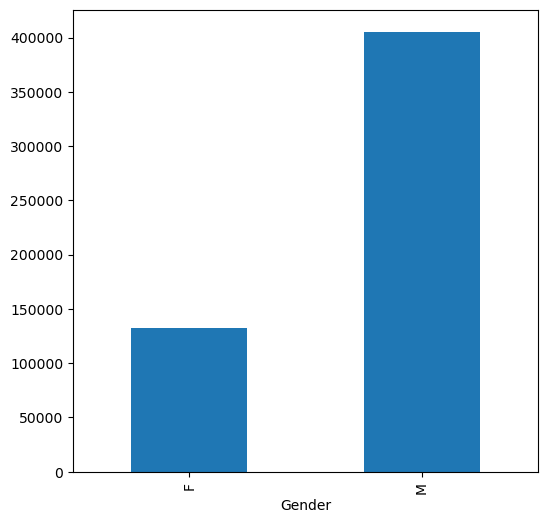

In [20]:
df.groupby('Gender').size().plot(kind = 'bar', figsize = (6,6))

<AxesSubplot:xlabel='Gender'>

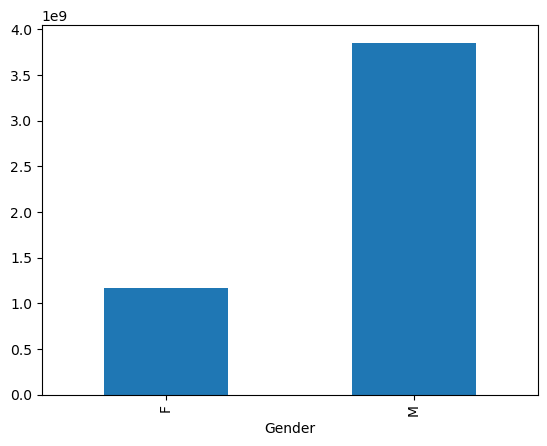

In [21]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'bar')

<AxesSubplot:ylabel='Purchase'>

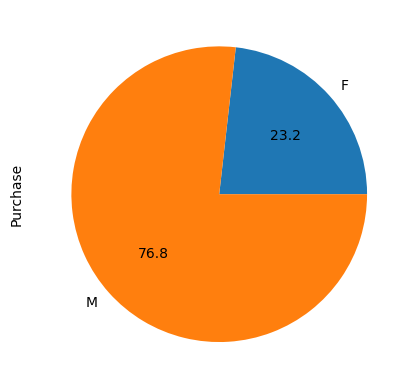

In [22]:
df.groupby('Gender').sum()['Purchase'].plot(kind = 'pie', autopct = "%.1f")

<AxesSubplot:ylabel='Purchase'>

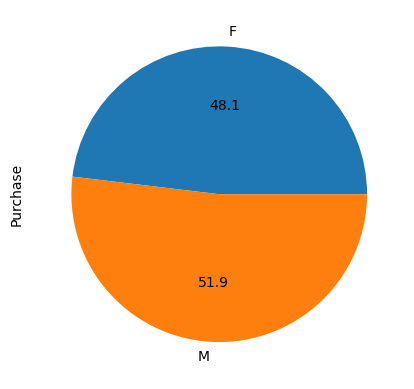

In [23]:
df.groupby('Gender').mean()['Purchase'].plot(kind = 'pie', autopct = "%.1f")

Analysed Male and Female expenditures based on the data such as which gender spends more, mean of expenditures, total amount spend by each gender etc. 